In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
#importing the dataset
iris_df = pd.read_csv("iris.csv", names = ['sepal_length','sepal_width', 'petal_length', 'petal_width', 'iris_species'] )

In [3]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,iris_species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   iris_species  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris_df['iris_species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: iris_species, dtype: int64

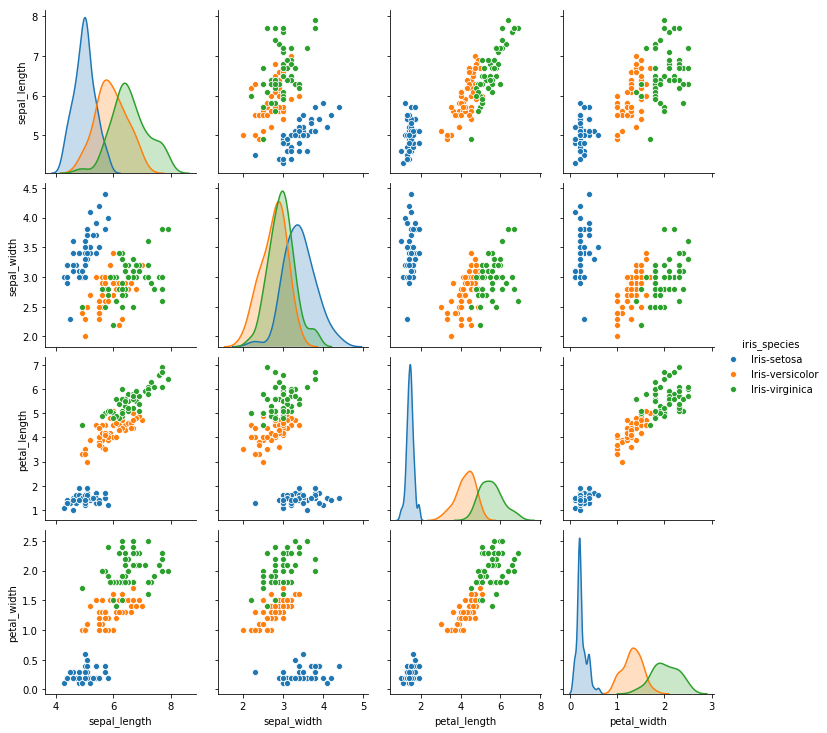

In [7]:
#pairplot of the DataFrame
pairplot = sns.pairplot(iris_df, hue='iris_species')

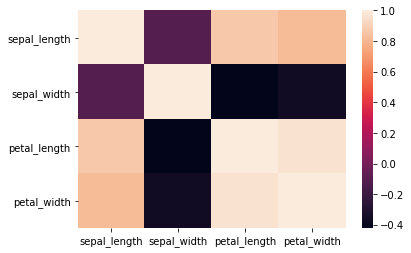

In [8]:
#checking the correlation between the columns of dataset
sns.heatmap(iris_df.corr())

In [9]:
#species mapping as numeric
species = {"Iris-setosa": 1, "Iris-virginica": 2, "Iris-versicolor": 3}
iris_df.iris_species = [species[item] for item in iris_df.iris_species]

In [10]:
iris_df['iris_species'].value_counts()

3    50
2    50
1    50
Name: iris_species, dtype: int64

In [11]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,iris_species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [12]:
#distinguishing the dataset without result
X = iris_df.drop(['iris_species'], axis=1)
y = iris_df.iris_species

In [13]:
#importing train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, stratify=y, random_state=45)

In [14]:
#importing RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
rand_for = RandomForestClassifier()
rand_for.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
#importing accuracy_score and checking the accuracy score
from sklearn.metrics import accuracy_score
y_pred = rand_for.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [16]:
accuracy

0.9210526315789473

In [17]:
a = ('5.0' ,'3.0', '1.0', '0.0')
df = pd.DataFrame([a])
result = rand_for.predict(df)

In [18]:
result

array([1])

Text(0.5,15,'Predicted label')

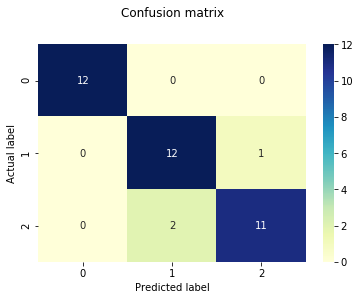

In [19]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [20]:
#importing classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.86      0.92      0.89        13
           3       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38

